<a href="https://colab.research.google.com/github/JuanZapa7a/Hello-world/blob/readme-edits/Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Fourier

La Transformada de Fourier es una herramienta matemática poderosa y versátil que se utiliza en una variedad de aplicaciones en procesamiento de señales e imágenes, ciencia, ingeniería y más. Aquí hay algunas aplicaciones interesantes de la Transformada de Fourier:

1. **Filtrado de Imágenes**: Ya hemos discutido cómo se puede utilizar para filtrar imágenes, ya sea para resaltar componentes de baja frecuencia (filtro de paso bajo) o componentes de alta frecuencia (filtro de paso alto).

2. **Compresión de Imágenes**: En la compresión de imágenes, como en el estándar JPEG, se utiliza la Transformada de Fourier para representar la imagen en el dominio de la frecuencia, lo que permite comprimir y almacenar la imagen de manera eficiente.

3. **Procesamiento de Audio**: En el procesamiento de audio, la Transformada de Fourier se utiliza para analizar y sintetizar señales de audio, lo que permite aplicar efectos como ecualización, eliminación de ruido y compresión de audio.

4. **Procesamiento de Señales**: La Transformada de Fourier se utiliza para analizar señales en el dominio de la frecuencia, lo que es útil en campos como la ingeniería de telecomunicaciones, donde se pueden separar las componentes de frecuencia de una señal.

5. **Imagenología Médica**: En aplicaciones de imagenología médica, como la resonancia magnética y la tomografía computarizada, la Transformada de Fourier se utiliza para procesar y reconstruir imágenes médicas.

6. **Análisis de Vibraciones**: En ingeniería mecánica y control de calidad, se utiliza para analizar vibraciones en máquinas y estructuras para detectar fallos y problemas de mantenimiento.

7. **Difusión de Calor**: En física, se utiliza en la resolución de ecuaciones de difusión de calor en sólidos y fluidos, lo que es fundamental en la transferencia de calor y la termodinámica.

8. **Óptica**: En óptica, la Transformada de Fourier se utiliza para analizar patrones de interferencia y para diseñar sistemas ópticos, como lentes y espejos.

9. **Procesamiento de Video**: Se utiliza en el procesamiento de video para aplicar efectos visuales, estabilización de video y detección de movimiento.

10. **Procesamiento de Señales Biomédicas**: En medicina, se utiliza para analizar señales biomédicas como el electroencefalograma (EEG) y el electrocardiograma (ECG) para diagnosticar trastornos médicos.

La Transformada de Fourier es una herramienta fundamental en muchas áreas de la ciencia y la ingeniería debido a su capacidad para descomponer señales y datos en componentes de frecuencia, lo que facilita el análisis y el procesamiento de información en diferentes dominios. Estas son solo algunas de las muchas aplicaciones interesantes que ofrece la Transformada de Fourier.

La Transformada de Fourier es una técnica matemática fundamental utilizada en procesamiento de señales e imágenes para representar una señal en el dominio de la frecuencia. En el código proporcionado, se aplican los siguientes pasos:

1. **Carga de la imagen**: Se comienza cargando una imagen de ejemplo desde Internet.

2. **Cálculo de la Transformada de Fourier 2D**: La Transformada de Fourier 2D se utiliza para convertir la imagen del dominio espacial al dominio de la frecuencia. La fórmula matemática para la Transformada de Fourier 2D es:

   $$
   F(u, v) = \int\int f(x, y) \cdot e^{-j2\pi(ux + vy)} \, dx \, dy
   $$

   Donde:
   - \(F(u, v)\) es la componente en el dominio de la frecuencia.
   - \(f(x, y)\) es la imagen original en el dominio espacial.
   - \(u\) y \(v\) son las coordenadas de frecuencia en el dominio de la frecuencia.
   - \(j\) es la unidad imaginaria (\(j^2 = -1\)).

3. **Desplazamiento del Espectro**: La función `np.fft.fftshift` se utiliza para desplazar el espectro de Fourier, de modo que la componente de frecuencia cero se encuentra en el centro de la imagen. Esto facilita la visualización y el procesamiento posterior.

4. **Cálculo de la Magnitud del Espectro**: La magnitud del espectro se calcula tomando el logaritmo de la magnitud absoluta del espectro desplazado. Esto se hace para mejorar la visualización de las frecuencias.

5. **Creación de una Máscara Circular**: Se crea una máscara circular negra en el centro del espectro de Fourier. Esta máscara se utiliza para eliminar las componentes de frecuencia de baja magnitud en el centro de la imagen.

6. **Aplicación de la Máscara al Espectro**: La máscara se aplica multiplicándola por el espectro de Fourier calculado previamente. Esto tiene el efecto de eliminar las componentes de frecuencia no deseadas en el centro.

7. **Antitransformación**: Finalmente, se antitransforma el espectro con la máscara para obtener una imagen en el dominio espacial. La antitransformación se realiza utilizando la Inversa de la Transformada de Fourier.

   $$
   f(x, y) = \int\int F(u, v) \cdot e^{j2\pi(ux + vy)} \, du \, dv
   $$

   Donde \(f(x, y)\) es la imagen antitransformada.

La aplicación de la máscara en el centro circular es útil en aplicaciones de filtrado de imágenes, ya que permite eliminar ciertas componentes de frecuencia no deseadas en el espectro de Fourier, lo que puede ayudar a mejorar la calidad de la imagen procesada.

Este proceso es fundamental en el procesamiento de imágenes médicas, ya que permite analizar las características de frecuencia de una imagen, lo que puede ser útil para detectar patrones específicos, como tumores u otras anomalías médicas en las imágenes médicas.

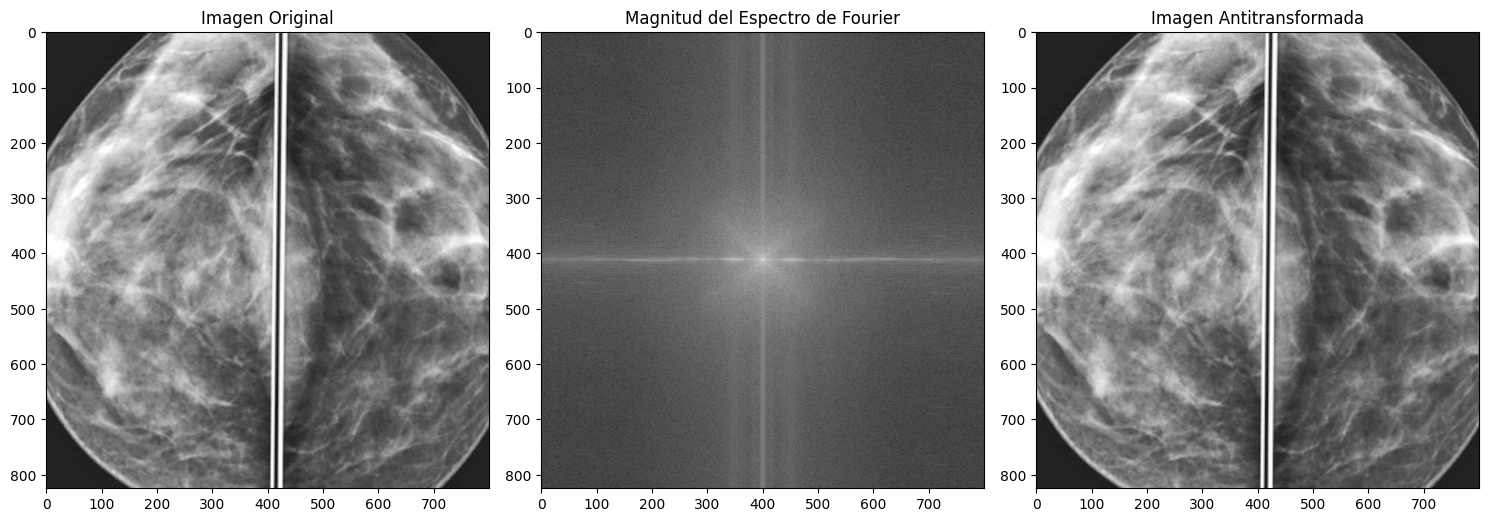

In [29]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Descargar una imagen de ejemplo desde Internet (puedes cambiar la URL)
url = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322068_1100-800x825.jpg"
response = urllib.request.urlopen(url)
img = np.asarray(bytearray(response.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_GRAYSCALE)

# Crear una figura con tres subplots en una fila
plt.figure(figsize=(15, 5))

# Subplot 1: Imagen Original
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

# Calcular la transformada de Fourier 2D
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Subplot 2: Magnitud del Espectro de Fourier
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitud del Espectro de Fourier')

# Antitransformar la imagen
f_transform_shifted_back = np.fft.ifftshift(f_transform_shifted)
img_back = np.fft.ifft2(f_transform_shifted_back).real

# Subplot 3: Imagen Antitransformada
plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('Imagen Antitransformada')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

Si deseas filtrar las altas frecuencias de una imagen en el dominio de la frecuencia utilizando la Transformada de Fourier, puedes hacerlo aplicando una máscara que elimine las componentes de alta frecuencia. Esto se puede lograr ajustando la máscara de manera que las componentes de alta frecuencia se atenúen o se eliminen.

Para filtrar las altas frecuencias, puedes seguir estos pasos:

1. Calcular la Transformada de Fourier 2D de la imagen original.
2. Crear una máscara que preserve las componentes de baja frecuencia y atenúe o elimine las componentes de alta frecuencia. Puedes usar diferentes tipos de máscaras, como una máscara gaussiana, una máscara rectangular o una máscara personalizada.
3. Aplicar la máscara multiplicándola por el espectro de Fourier.
4. Calcular la antitransformada de Fourier de la imagen filtrada.

Aquí hay un ejemplo de cómo aplicar un filtro de paso bajo (que conserva las bajas frecuencias y atenúa las altas frecuencias) utilizando una máscara gaussiana:

En este ejemplo, se utiliza una máscara gaussiana para realizar un filtro de paso bajo, lo que significa que las altas frecuencias se atenúan y las bajas frecuencias se conservan. Puedes ajustar el valor de `sigma` para controlar la cantidad de filtrado.

Este proceso te permitirá filtrar las altas frecuencias de una imagen en el dominio de la frecuencia y obtener una imagen filtrada en el dominio espacial.

825 800
412 400


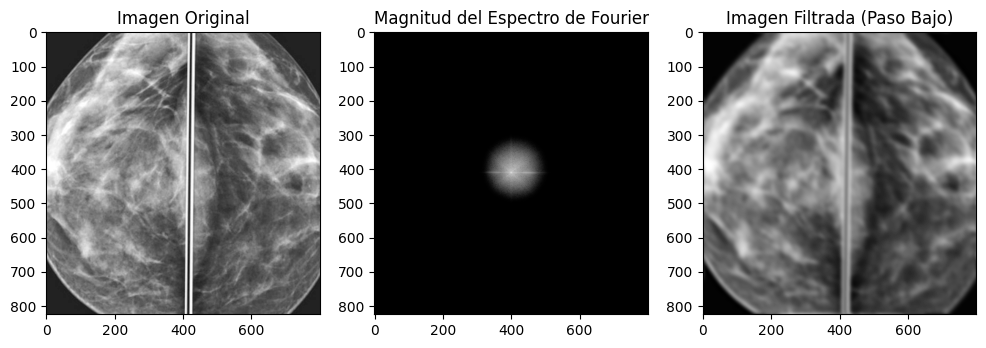

In [28]:
# Crear una máscara gaussiana para el filtro de paso bajo
rows, cols = img.shape
print(rows,cols)
center_x, center_y = rows // 2, cols // 2
print(center_x,center_y)
sigma = 20  # Ajusta el valor de sigma según tus necesidades
x = np.linspace(0, cols - 1, cols)
y = np.linspace(0, rows - 1, rows)
X, Y = np.meshgrid(x, y)
mask = np.exp(-((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * sigma ** 2))

# Aplicar la máscara al espectro de Fourier
lowpass_spectrum = f_transform_shifted * mask
magnitude_spectrum = np.log(np.abs(lowpass_spectrum) + 1)


# Calcular la antitransformada de Fourier de la imagen filtrada
filtered_img = np.fft.ifft2(np.fft.ifftshift((lowpass_spectrum))).real

# Visualizar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitud del Espectro de Fourier')
plt.subplot(133)
plt.imshow(filtered_img, cmap='gray')
plt.title('Imagen Filtrada (Paso Bajo)')
plt.show()

**NOTA:**

Cuando visualizas el espectro en magnitud de la transformada de Fourier, es común aplicar una transformación logarítmica para mejorar la visualización y resaltar mejor las características en la imagen del espectro. Aquí hay algunas razones por las cuales se utiliza `np.log(np.abs(...))` en lugar de simplemente `np.abs(...)`:

1. Compresión de rango dinámico: La magnitud de la transformada de Fourier suele tener un rango dinámico muy amplio. Aplicar el logaritmo comprime este rango dinámico, lo que significa que los valores más pequeños se amplifican y los valores más grandes se atenúan. Esto hace que las características más débiles en el espectro sean más visibles, lo que es especialmente útil cuando hay un ruido de fondo o componentes de alta frecuencia que pueden no ser evidentes en una representación lineal.

2. Resalta detalles: El logaritmo puede hacer que los detalles de baja intensidad en el espectro sean más prominentes. Esto puede ayudar a detectar componentes de frecuencia que, en una representación lineal, podrían quedar ocultos por componentes de alta intensidad.

3. Interpretación logarítmica: En muchas aplicaciones, una representación logarítmica del espectro se ajusta mejor a la percepción humana y facilita la identificación de patrones o características en la imagen del espectro. Nuestros sentidos no perciben de manera lineal, por lo que una representación logarítmica puede ayudar a alinear mejor la visualización con nuestra percepción visual.

4. Reducción de efectos de truncamiento: Cuando tomas el logaritmo de la magnitud, incluso pequeños valores no nulos se mapean a valores positivos. Esto evita problemas de visualización cuando hay valores cercanos a cero en la magnitud de la transformada de Fourier.

En resumen, aplicar `np.log(np.abs(...))` al espectro de la transformada de Fourier es una técnica común para mejorar la visualización y resaltar características importantes en la imagen del espectro. Esto hace que sea más fácil detectar y analizar componentes de frecuencia en la señal transformada.

Para aplicar un filtro de paso alto en el dominio de la frecuencia utilizando la Transformada de Fourier, puedes seguir estos pasos:

1. Calcular la Transformada de Fourier 2D de la imagen original.
2. Crear una máscara que preserve las componentes de alta frecuencia y atenúe o elimine las componentes de baja frecuencia. Puedes utilizar una máscara complementaria de la que usamos para el filtro de paso bajo, como una máscara rectangular o una máscara personalizada.
3. Aplicar la máscara multiplicándola por el espectro de Fourier.
4. Calcular la antitransformada de Fourier de la imagen filtrada.

En este ejemplo, hemos utilizado una máscara gaussiana complementaria para el filtro de paso alto. Esta máscara atenúa las bajas frecuencias y preserva las altas frecuencias. Puedes ajustar el valor de `sigma` para controlar la cantidad de filtrado.

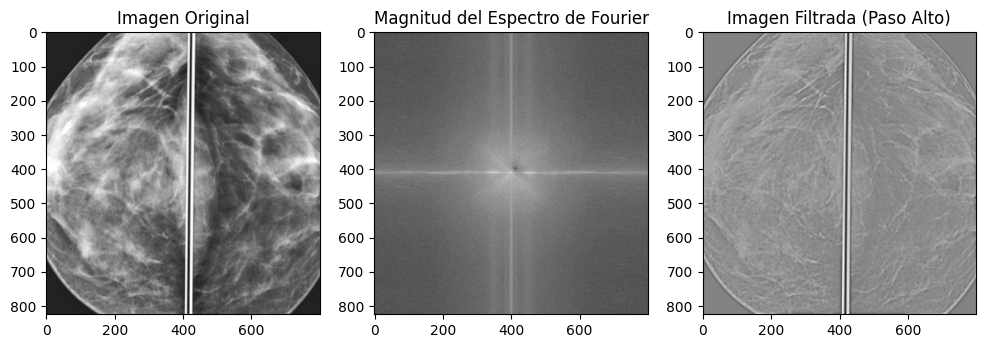

In [34]:
# Crear una máscara gaussiana para el filtro de paso alto
rows, cols = img.shape
center_x, center_y = rows // 2, cols // 2
sigma = 30  # Ajusta el valor de sigma según tus necesidades
x = np.linspace(0, cols - 1, cols)
y = np.linspace(0, rows - 1, rows)
X, Y = np.meshgrid(x, y)
mask = 1 - np.exp(-((X - center_x) ** 2 + (Y - center_y) ** 2) / (2 * sigma ** 2))

# Aplicar la máscara al espectro de Fourier
highpass_spectrum = f_transform_shifted * mask
magnitude_spectrum = np.log(np.abs(highpass_spectrum) + 1)


# Calcular la antitransformada de Fourier de la imagen filtrada
highpass_img = np.fft.ifft2(np.fft.ifftshift(highpass_spectrum)).real

# Visualizar la imagen original y la imagen filtrada
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitud del Espectro de Fourier')
plt.subplot(133)
plt.imshow(highpass_img, cmap='gray')
plt.title('Imagen Filtrada (Paso Alto)')
plt.show()

Un ejemplo del uso de la Transformada de Fourier en imagenología médica se encuentra en la resonancia magnética (RM). La RM es una técnica de diagnóstico por imágenes que utiliza campos magnéticos y ondas de radio para obtener imágenes detalladas del interior del cuerpo humano. La Transformada de Fourier desempeña un papel fundamental en la adquisición y reconstrucción de imágenes de RM.

Aquí hay una breve explicación de cómo se utiliza la Transformada de Fourier en la resonancia magnética:

  1.  Adquisición de Datos: Durante una exploración de RM, se somete al paciente a un campo magnético fuerte y se le expone a pulsos de radiofrecuencia. Esto provoca que los núcleos de hidrógeno en el cuerpo emitan señales de radio detectadas por una antena de RM.

  2.  Espacio k: Las señales de RM se recopilan en el llamado "espacio k" (o espacio de Fourier). Este espacio representa las señales en el dominio de la frecuencia espacial en lugar del dominio espacial tradicional. Cada punto en el espacio k corresponde a una frecuencia espacial particular.

  3.  Transformada de Fourier: Para obtener una imagen en el dominio espacial, las señales en el espacio k se someten a una Transformada de Fourier bidimensional. Esta transformada convierte las señales en el espacio k en una imagen en el dominio espacial.

  4.  Imagen de RM: La imagen resultante de la Transformada de Fourier es la imagen de RM que se muestra al médico y al paciente. Esta imagen revela detalles anatómicos y patológicos del cuerpo humano, como tejidos blandos, órganos, tumores y lesiones.

La clave aquí es que la Transformada de Fourier se utiliza para convertir las señales recopiladas en el espacio k en una imagen que representa la distribución de la densidad de protones en el cuerpo del paciente. Esta imagen es esencial para el diagnóstico médico y ha revolucionado la forma en que se visualizan y comprenden las estructuras internas del cuerpo humano sin la necesidad de radiación ionizante, como en la radiografía o la tomografía computarizada.

En resumen, la Transformada de Fourier en la resonancia magnética médica permite la obtención de imágenes detalladas y de alta resolución del cuerpo humano, lo que ayuda a los médicos a diagnosticar enfermedades y a planificar tratamientos.

Por supuesto, aquí tienes más ejemplos de cómo se puede utilizar la Transformada de Fourier para procesar imágenes:

1. **Eliminación de Ruido en Imágenes**: La Transformada de Fourier se utiliza para eliminar el ruido periódico de una imagen. Al convertir la imagen al dominio de la frecuencia y eliminar las componentes de alta frecuencia asociadas al ruido, se puede obtener una versión más limpia de la imagen.

2. **Compresión de Imágenes**: En la compresión de imágenes, la Transformada de Fourier se utiliza para representar la imagen en el dominio de la frecuencia, y luego se eliminan las componentes de baja energía. Esto reduce la cantidad de datos necesarios para almacenar la imagen sin una pérdida significativa de calidad.

3. **Mejora del Contraste**: Al ajustar el espectro de Fourier de una imagen, es posible aumentar o disminuir el contraste de la imagen. Esto es útil para resaltar características específicas de la imagen.

4. **Filtrado de Texturas y Patrones**: Se puede utilizar para eliminar o resaltar texturas y patrones en una imagen. Por ejemplo, puedes eliminar un patrón de rejilla o enfatizar las texturas en una imagen.

5. **Detección de Bordes**: La Transformada de Fourier puede ayudar en la detección de bordes en una imagen al resaltar las frecuencias altas en la dirección de los bordes.

6. **Reconstrucción de Imágenes**: En tomografía por rayos X y resonancia magnética, la Transformada de Fourier se utiliza para reconstruir imágenes 2D o 3D a partir de proyecciones.

7. **Análisis de Textura**: Se utiliza en el análisis de textura para extraer características texturales de una imagen, como la rugosidad, la regularidad y la dirección de las texturas.

8. **Procesamiento de Video**: La Transformada de Fourier se aplica a cada cuadro de un video para analizar las componentes de frecuencia en el tiempo. Esto es útil para detectar patrones de movimiento, compresión de video y análisis de escenas.

9. **Restauración de Imágenes Borrosas**: En la restauración de imágenes borrosas, se utiliza para comprender y corregir el efecto de difusión de un sistema de imagen. Esto se aplica en fotografía forense y astronomía.

10. **Identificación de Frecuencias Resonantes**: En la inspección de materiales y estructuras, se utiliza para identificar las frecuencias resonantes y las vibraciones no deseadas.

Estos son solo algunos ejemplos de cómo se utiliza la Transformada de Fourier en el procesamiento de imágenes. Es una herramienta poderosa que se adapta a una amplia variedad de aplicaciones en ciencia, tecnología y medicina, y su capacidad para analizar y manipular imágenes en el dominio de la frecuencia proporciona numerosas oportunidades para mejorar y comprender datos visuales.

La mejora del contraste es un proceso en el que se ajusta el rango de valores de píxeles en una imagen para que los detalles sean más visibles. La Transformada de Fourier puede ser útil en este proceso para realzar componentes específicas de frecuencia en la imagen. A continuación, se muestra un ejemplo simple de cómo mejorar el contraste de una imagen utilizando la Transformada de Fourier:

En este ejemplo:

1. Cargamos una imagen en escala de grises.
2. Calculamos la Transformada de Fourier 2D de la imagen.
3. Calculamos el espectro de magnitud de la Transformada de Fourier para ver las componentes de frecuencia.
4. Aplicamos una transformación logarítmica al espectro de magnitud para mejorar su visualización.
5. Realizamos la inversa de la Transformada de Fourier para obtener la imagen mejorada.

La imagen mejorada tendrá un mayor contraste y los detalles serán más visibles en comparación con la imagen original. Puedes ajustar los parámetros y experimentar con diferentes máscaras en el dominio de la frecuencia para obtener efectos de mejora de contraste específicos para tus necesidades.

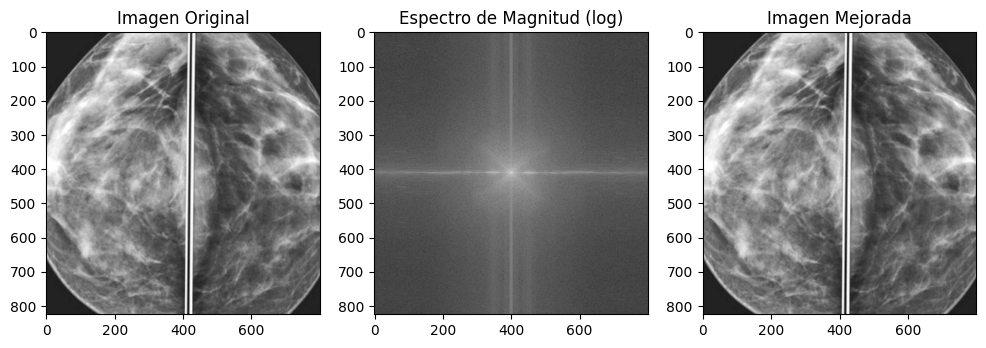

In [23]:
# Calcular la Transformada de Fourier 2D de la imagen
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)

# Calcular el espectro de magnitud
magnitude_spectrum = np.abs(f_transform_shifted)

# Aplicar una transformación logarítmica para mejorar la visualización
log_magnitude_spectrum = np.log(1 + magnitude_spectrum)

# Inversa de la Transformada de Fourier para obtener la imagen mejorada
inverse_transform = np.fft.ifft2(np.fft.ifftshift(f_transform_shifted)).real

# Visualizar la imagen original y la imagen mejorada
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(132)
plt.imshow(log_magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud (log)')

plt.subplot(133)
plt.imshow(inverse_transform, cmap='gray')
plt.title('Imagen Mejorada')
plt.show()

El análisis de textura se refiere al proceso de cuantificar y describir las características repetitivas y estructurales en una imagen, como patrones, rugosidad, regularidad y detalles texturales. La Transformada de Fourier se utiliza en el análisis de textura para extraer información relevante sobre las características de frecuencia en una imagen. Aquí tienes un ejemplo de cómo se puede utilizar la Transformada de Fourier para analizar la textura de una imagen:

```python

```

En este ejemplo:

1. Cargamos una imagen que contiene textura en escala de grises.

2. Calculamos la Transformada de Fourier 2D de la imagen.

3. Calculamos el espectro de magnitud del resultado para visualizar las componentes de frecuencia presentes en la imagen.

El espectro de magnitud nos mostrará patrones y estructuras relacionadas con la textura de la imagen. Puedes observar cómo las características de textura se reflejan en las componentes de alta frecuencia en el espectro de magnitud.

El análisis de textura no se detiene aquí; es posible utilizar medidas específicas, como la energía espectral, la entropía, la dirección de las frecuencias predominantes y otros descriptores para cuantificar y caracterizar la textura en la imagen de manera más precisa.

Este es un primer paso en el análisis de textura con la Transformada de Fourier. A partir de aquí, puedes aplicar medidas y algoritmos más avanzados para extraer información cuantitativa sobre la textura y utilizarla en diversas aplicaciones, como reconocimiento de patrones, detección de anomalías y más.



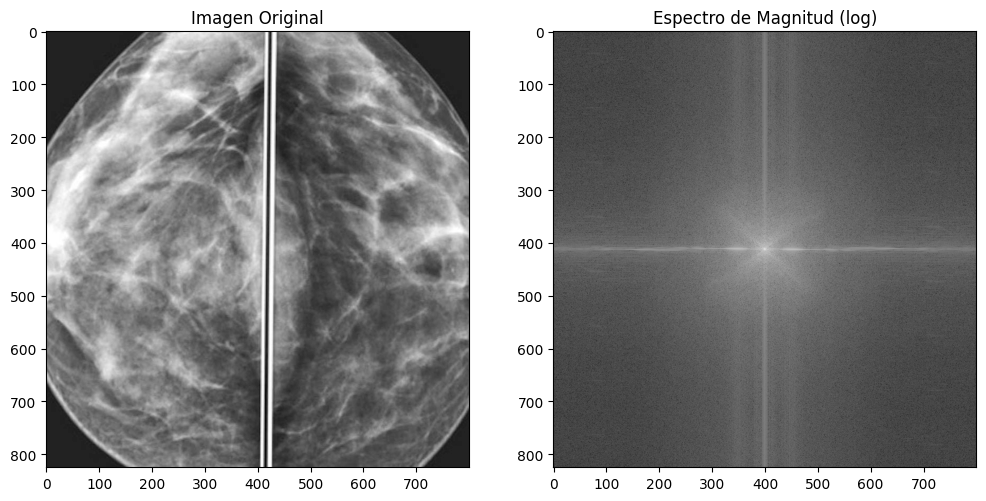

In [24]:

# Calcular el espectro de magnitud
magnitude_spectrum = np.abs(f_transform_shifted)

# Visualizar la imagen original y su espectro de magnitud
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(122)
plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
plt.title('Espectro de Magnitud (log)')
plt.show()

Para realizar un análisis de textura más detallado utilizando la Transformada de Fourier, puedes calcular medidas específicas que proporcionen información cuantitativa sobre la textura de la imagen. Aquí tienes ejemplos de cómo calcular la energía espectral, la entropía y la dirección de las frecuencias predominantes:

1. **Energía Espectral**:
   
   La energía espectral es una medida que cuantifica la concentración de energía en el espectro de magnitud de la Transformada de Fourier. Cuanto más concentrada esté la energía en ciertas frecuencias, mayor será la energía espectral.

2. **Entropía**:

   La entropía es una medida de la cantidad de información o desorden presente en el espectro de magnitud. Cuanto mayor sea la entropía, más dispersa estará la energía en diferentes frecuencias.

3. **Dirección de las Frecuencias Predominantes**:

   Para determinar la dirección de las frecuencias predominantes en la textura, puedes calcular el ángulo de fase correspondiente a la componente de frecuencia con la magnitud máxima.

Estas medidas proporcionan información adicional sobre la textura de la imagen. Por ejemplo, la energía espectral puede indicar cuán uniforme o regular es la textura, la entropía puede indicar la complejidad de la textura y la dirección de las frecuencias predominantes puede dar una idea de la orientación predominante de la textura.

Puedes combinar estas medidas con técnicas de procesamiento de imágenes y aprendizaje automático para clasificar texturas, detectar anomalías o realizar análisis más avanzados de textura en imágenes.

In [25]:
# Calcular la energía espectral
spectral_energy = np.sum(magnitude_spectrum ** 2)
print(f"Energía Espectral: {spectral_energy}\n")


# Calcular la entropía
normalized_magnitude = magnitude_spectrum / np.sum(magnitude_spectrum)
entropy = -np.sum(normalized_magnitude * np.log2(normalized_magnitude + 1e-10))
print(f"Entropía: {entropy}\n")


# Encontrar las coordenadas de la frecuencia máxima
max_row, max_col = np.unravel_index(np.argmax(magnitude_spectrum), magnitude_spectrum.shape)

# Calcular la dirección en grados
angle_rad = np.arctan2(max_row - magnitude_spectrum.shape[0] / 2, max_col - magnitude_spectrum.shape[1] / 2)
angle_deg = np.degrees(angle_rad)
print(f"Dirección de las Frecuencias Predominantes (grados): {angle_deg}")


Energía Espectral: 7367725161720002.0

Entropía: 15.769329766575192

Dirección de las Frecuencias Predominantes (grados): -90.0
